## Observations and Insights 

In [302]:
#Observations:
#1)mouse weight and tumor volume are positively correlated
#2)Mice treated with Capomulin and Ramicane had lower final tumor volumes than other treatments
#3)Tumor volume got smaller over time for mouse s185 as it was being treated with Capomulin


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")
# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [303]:
# Checking the number of mice.
merge_df['Mouse ID'].value_counts()

g989    13
k862    10
l725    10
s185    10
m601    10
        ..
o848     1
t573     1
n482     1
h428     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [304]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [305]:
# Optional: Get all the data for the duplicate mouse ID. 



In [306]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_duplicates_df = merge_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'])

In [307]:
# Checking the number of mice in the clean DataFrame.
no_duplicates_df['Mouse ID'].value_counts()

k862    10
t198    10
s185    10
m601    10
k483    10
        ..
o848     1
t573     1
n482     1
h428     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [308]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
no_duplicates_df['Drug Regimen'].value_counts()


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

In [309]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
sum_mean = no_duplicates_df[['Tumor Volume (mm3)','Drug Regimen']].groupby('Drug Regimen').mean()
sum_var = no_duplicates_df[['Tumor Volume (mm3)','Drug Regimen']].groupby('Drug Regimen').var()
sum_median = no_duplicates_df[['Tumor Volume (mm3)','Drug Regimen']].groupby('Drug Regimen').median()
sum_std = no_duplicates_df[['Tumor Volume (mm3)','Drug Regimen']].groupby('Drug Regimen').std()
sum_sem = no_duplicates_df[['Tumor Volume (mm3)','Drug Regimen']].groupby('Drug Regimen').sem()
    


## Bar and Pie Charts

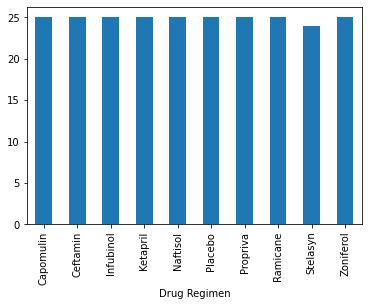

In [310]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
num_mice = no_duplicates_df[['Mouse ID','Drug Regimen']].groupby('Drug Regimen').nunique()
num_mice['Mouse ID']
num_mice.index
num_mice['Mouse ID'].plot(kind = 'bar')

Text(0, 0.5, 'Number of mice')

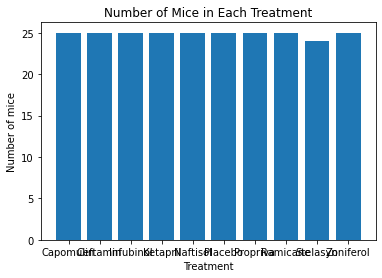

In [311]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(num_mice.index, num_mice['Mouse ID'])
plt.title("Number of Mice in Each Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of mice")

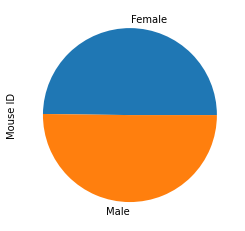

In [312]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
num_gender = no_duplicates_df[['Mouse ID','Sex']].groupby('Sex').nunique()
num_gender['Mouse ID'].plot(kind = 'pie')

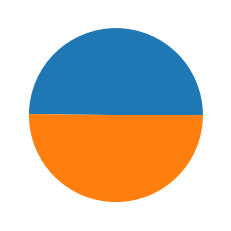

In [313]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(num_gender['Mouse ID'])
plt.show()

## Quartiles, Outliers and Boxplots

In [314]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_df = no_duplicates_df.loc[(no_duplicates_df['Drug Regimen'] == 'Capomulin') | 
                                      (no_duplicates_df['Drug Regimen'] == 'Ramicane') |
                                      (no_duplicates_df['Drug Regimen'] == 'Infubinol') |
                                      (no_duplicates_df['Drug Regimen'] == 'Ceftamin'),:] 
# Start by getting the last (greatest) timepoint for each mouse
mouse_max = final_tumor_df[['Mouse ID','Timepoint']].groupby('Mouse ID').max()




mouse_tumor_final_vol_df = pd.merge(mouse_max,final_tumor_df, left_on = (mouse_max.index,'Timepoint'), right_on =('Mouse ID','Timepoint'))
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_tumor_final_vol_df.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0


In [315]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ceftamin','Infubinol','Ramicane']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
tumor_IQR = []
tumor_lower_bound = []
tumor_upper_bound = []
tumor_center = []
outliers = []
quartiles = mouse_tumor_final_vol_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].quantile([.25,.5,.75])
for my_treatment in treatments:
    my_IQR = quartiles[my_treatment][.75]-quartiles[my_treatment][.25]
    tumor_IQR.append(my_IQR)
    tumor_center.append(quartiles[my_treatment][.5])
    my_lower = quartiles[my_treatment][.25]-(1.5*my_IQR)
    my_upper = quartiles[my_treatment][.75]+(1.5*my_IQR)
    tumor_lower_bound.append(my_lower)
    tumor_upper_bound.append(my_upper)
    my_vol = mouse_tumor_final_vol_df['Tumor Volume (mm3)'].loc[(mouse_tumor_final_vol_df['Drug Regimen'] == my_treatment)]
    my_outliers = mouse_tumor_final_vol_df.loc[(mouse_tumor_final_vol_df['Drug Regimen'] == my_treatment) &
                                            ((mouse_tumor_final_vol_df['Tumor Volume (mm3)']<my_lower) |
                                            (mouse_tumor_final_vol_df['Tumor Volume (mm3)']>my_upper))]
    
    tumor_vol.append(my_vol)
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


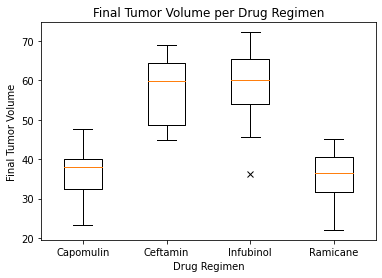

In [316]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol, labels = treatments, sym = 'x')
plt.title('Final Tumor Volume per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume')
plt.show()

## Line and Scatter Plots

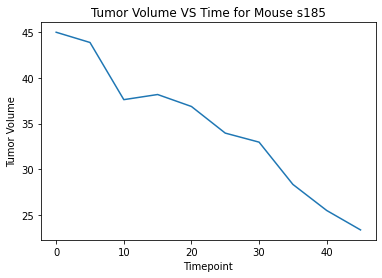

In [317]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
my_Capomulin_mouse = no_duplicates_df.loc[(no_duplicates_df['Drug Regimen'] == 'Capomulin')]
my_Capomulin_mouse.head()
Capomulin_tumor_time = no_duplicates_df.loc[(no_duplicates_df['Mouse ID'] == 's185')]
plt.plot(Capomulin_tumor_time['Timepoint'], Capomulin_tumor_time['Tumor Volume (mm3)'])
plt.title('Tumor Volume VS Time for Mouse s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

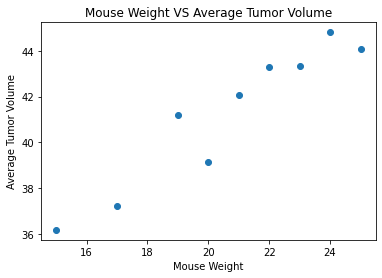

In [318]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
my_Capomulin = no_duplicates_df.loc[(no_duplicates_df['Drug Regimen'] == 'Capomulin')] 
my_weight = my_Capomulin.groupby(['Weight (g)'])['Tumor Volume (mm3)'].mean()
my_weight
plt.scatter(my_weight.index,my_weight)
plt.title('Mouse Weight VS Average Tumor Volume')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

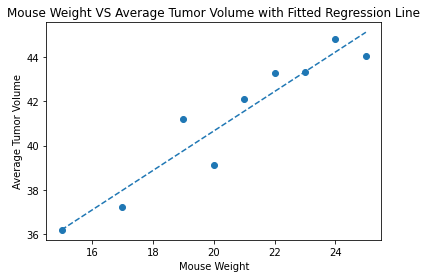

In [319]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
my_slope, my_int, my_r, my_p, my_stderr = st.linregress(my_weight.index,my_weight)
my_fit = my_slope * my_weight.index + my_int

plt.scatter(my_weight.index,my_weight)
plt.plot(my_weight.index,my_fit,'--')
plt.title('Mouse Weight VS Average Tumor Volume with Fitted Regression Line')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()